In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, date, time, timedelta

In [124]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [125]:
database_path="hawaii.sqlite"
engine=create_engine(f"sqlite:///{database_path}")
conn=engine.connect()
inspector=inspect(engine)

In [126]:
#I could not figure out the name of the tables of the database.
for table_name in inspector.get_table_names():
    for column in inspector.get_columns(table_name):
        print("Column: %s" % column['name'])
        print(table_name)

Column: id
measurement
Column: station
measurement
Column: date
measurement
Column: prcp
measurement
Column: tobs
measurement
Column: id
station
Column: station
station
Column: name
station
Column: latitude
station
Column: longitude
station
Column: elevation
station


In [127]:
Base=automap_base()
Base.prepare(engine,reflect=True)

In [128]:
Base.classes.keys()

['measurement', 'station']

In [129]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [130]:
datax=pd.read_sql("SELECT * FROM measurement",conn)
data = pd.read_sql("SELECT * FROM station", conn)

In [131]:
datax.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [132]:
data.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [133]:
session=Session(engine)

In [134]:
#Last row of data base
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [135]:
#Query will start a year ago from last registered date
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [136]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>="2016-08-23").all()

In [137]:
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [138]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(results,columns=["Date","Precipitations"])
dff=df.sort_values(by=["Date"],ascending=True)
dff=dff.set_index(["Date"])

In [139]:
dff.head(5)

,Precipitations
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [140]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dff.describe()

,Precipitations
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


[]

<Figure size 864x720 with 0 Axes>

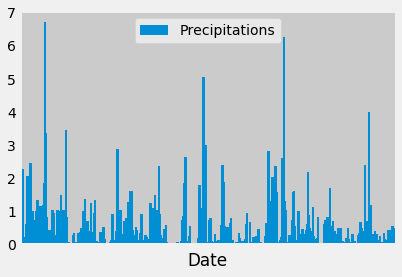

In [141]:
# Use Pandas Plotting with Matplotlib to plot the data
ax= plt.figure(figsize=(12,10))
ax=dff.plot.bar(width=15)
ax.set_xticklabels([])

In [142]:
## Design a query to show how many stations are available in this dataset?
number_Stations=session.query(func.count(Station.id)).all()
print(number_Stations)

[(9,)]


In [143]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity_stations=session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


In [144]:
activity_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [145]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()
temp

[(54.0, 85.0, 71.66378066378067)]

In [146]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures=session.query(Measurement.tobs).\
        filter(Measurement.station=="USC00519281",Measurement.date>="2016-08-23").all()


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 53., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

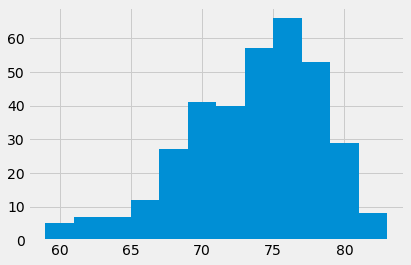

In [147]:
#Turn a list of tuples into a list
only_list = [item for t in temperatures for item in t] 
only_list
plt.hist(only_list, bins=12)

In [170]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date,end_date):
    temperatures=session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
        filter(func.strftime(Measurement.date)>=start_date,func.strftime(Measurement.date)<=end_date).all()
    return(temperatures)

In [171]:
vac_starts='2019-07-28'
vac_ends='2019-08-05'
prev_year_st=dt.datetime.strptime(vac_starts,"%Y-%m-%d")-dt.timedelta(days=730)
prev_year_en=dt.datetime.strptime(vac_ends,"%Y-%m-%d")-dt.timedelta(days=730)
my_trip=calc_temps(prev_year_st, prev_year_en)
print(my_trip)

[(72.0, 79.10810810810811, 84.0)]


In [173]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
quer=[Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
accum_rainfall=session.query(*quer).filter(Measurement.station==Station.station,func.strftime(Measurement.date)>=prev_year_st,func.strftime(Measurement.date)<=prev_year_en).\
    group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
print(accum_rainfall)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]


In [151]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def month_day(datex):
    daily_n=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(func.strftime("%m-%d", Measurement.date) == datex).all()
    return(daily_n)

In [178]:
any_date="01-01"
m_d=month_day(any_date)
print(m_d)

[(62.0, 77.0, 69.15384615384616)]


In [177]:
date_dt

datetime.datetime(1900, 1, 1, 0, 0)

In [199]:
daily_n=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs),func.count(Measurement.date)).\
        filter(Measurement.date == "201-01-01").all()
daily_n

[(63.0, 71.0, 68.42857142857143, 7)]